<a href="https://colab.research.google.com/github/Psubrat98/Assessment-Coding-Programs/blob/main/Job_assesment/Paytm_App_QR_code_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required dependencies:

In [1]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install qrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading required lliabraries:


In [3]:
import qrcode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Creating QR code:

In [4]:
# Example Data
data = "https://www.thepythoncode.com"
# Output File name
file_name = 'site.png'
# Generate QR code
image = qrcode.make(data)
# Save image to a file
image.save(file_name)

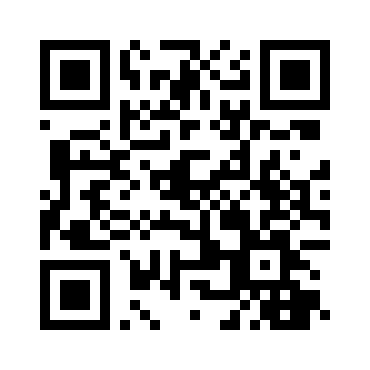

In [5]:
# Read image
img = cv2.imread('/content/site.png')
# Show image
cv2_imshow(img)

Another way to create QR code with custom parameters:

In [6]:
# initializing object
qr = qrcode.QRCode(version=1, box_size=12, border=4)
# Add above data to QR code
qr.add_data(data)
# Compile the data into QR code array
qr.make()
# Print the image shape
print('Shape of Qr image:',np.array(qr.get_matrix()).shape)
# Transfer the array into actual image
image2 = qr.make_image(fill_color = 'white', back_color = 'black')
# Save it to file
image2.save('Site_inversed.png')

Shape of Qr image: (37, 37)


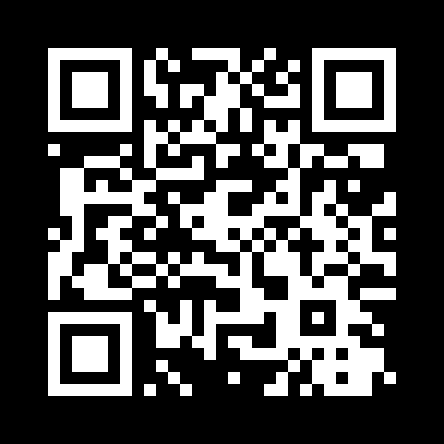

In [7]:
# Read image
img2 = cv2.imread('/content/Site_inversed.png')
# Show image
cv2_imshow(img2)

In [8]:
# initialize the cv2 QRCode detector
detector = cv2.QRCodeDetector()

In [9]:
# Detect and decode
data, bbox, straight_qrcode =detector.detectAndDecode(img)

In [10]:
data

'https://www.thepythoncode.com'

The detectAndDecode() function takes an image as an input and decodes it to return a tuple of 3 values: the data decoded from the QR code, the output array of vertices of the found QR code quadrangle, and the output image containing rectified and binarized QR code.

Now We just need data and bbox here, bbox will help us draw the quadrangle in the image and data will be printed to the console!

In [11]:
# if there is a QR code
if bbox is not None:
  print(f"QRCode data:\n{data}")
else:
  print("QR code not detected")
  # display the image with lines
  # length of bounding box
  n = len(bbox)
  for i in range(n):
    nextPointIndex = (i+1) % n
    cv2.line(image, tuple(points[i][0]), tuple(points[nextPointIndex][0]), (255,0,0), 5)

QRCode data:
https://www.thepythoncode.com


Finally, let's show the image and quit when a key is pressed:

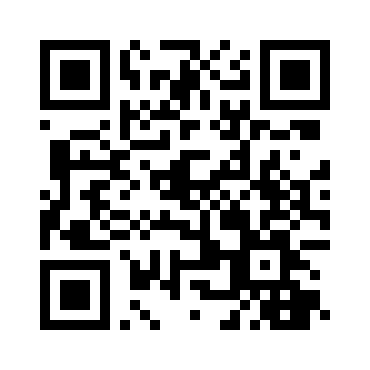

In [12]:
# display the result
cv2_imshow(img)

Now we have to detect QR code through canera:

In [ ]:
# initalize the cam
cap = cv2.VideoCapture(0)
while True:
  _, img = cap.read()
  # detect and decode
cap_data, cap_bbox, _ = detector.detectAndDecode(img)
# check if there is a QRCode in the image
if cap_bbox is not None:
  # display the image with lines
  for i in range(len(cap_bbox)):
    # draw all lines
    cv2.line(img, tuple(Cap_bbox[i][0]), tuple(Cap_bbox[(i+1) % len(Cap_bbox)][0]), color=(255, 0, 0), thickness=2)
    if Cap_data:
      print("[+] QR Code detected, data:", Cap_data)
# display the result
cv2_imshow(img)    
if cv2.waitKey(1) == ord("q"):
  break
  cap.release()